In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("../Data Cleaning/scores_reference.csv", index_col=0)

In [80]:

df.columns

Index(['index', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave',
       'BF', 'SR', '100', '50', '0', '4s', '6s', 'Country', 'Debut Year',
       'Last Year', 'Total Years', 'Innings per Matches',
       'Not outs per innings',
       'Arithmatic Average of Total Runs by Inns Played',
       'Not Out when scored highest', 'HS Numeric', '100's per innings',
       '50's per innings', '0's per innings', '4s numeric', '6s numeric',
       'boundaries', '4s per Inns', '6s per Inns', 'Boundary Ave per Inns',
       'boundaries per innings', 'runs scored by boundaries',
       'boundaries to runs ratio', 'runs without boundaries',
       'BF without boundaries', 'Strike Rate without boundaries',
       'Avg runs per year'],
      dtype='object')

In [81]:

df.describe()

,index,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,...,4s per Inns,6s per Inns,Boundary Ave per Inns,boundaries per innings,runs scored by boundaries,boundaries to runs ratio,runs without boundaries,BF without boundaries,Strike Rate without boundaries,Avg runs per year
count,908.000000,908.000000,908.000000,908.000000,908.000000,906.000000,908.000000,908.000000,908.000000,908.000000,...,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,1072.562775,83.451542,66.390969,12.322687,1601.995595,21.879437,2102.348018,70.562324,1.862335,8.639868,...,1.465569,0.224293,7.208034,1.689862,679.535242,0.382694,922.460352,1942.985683,45.327094,150.759255
std,608.059902,76.566456,69.837804,12.541110,2392.729760,11.842331,3024.216596,16.670141,4.683570,14.890013,...,1.124401,0.234722,5.377887,1.264495,1082.748901,0.127838,1356.220216,2783.965485,9.646497,182.006659
min,2.000000,2.000000,2.000000,0.000000,4.000000,1.200000,3.000000,15.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,11.267606,0.666667
25%,562.250000,29.000000,19.000000,3.000000,162.750000,12.125000,248.500000,60.487500,0.000000,0.000000,...,0.500000,0.048049,2.607627,0.600000,58.000000,0.313764,103.000000,235.750000,40.147741,21.795455
50%,1088.500000,58.000000,41.000000,8.000000,592.000000,20.595000,809.500000,70.920000,0.000000,2.000000,...,1.192974,0.153846,6.160256,1.426786,230.000000,0.389793,337.500000,738.500000,45.644186,69.881944
75%,1609.250000,113.000000,87.000000,17.000000,1897.250000,30.325000,2639.500000,81.032500,1.000000,11.000000,...,2.240150,0.333333,10.897829,2.546346,787.000000,0.466525,1134.000000,2434.750000,51.042693,221.218182
max,2111.000000,463.000000,452.000000,83.000000,18426.000000,68.500000,21368.000000,133.330000,49.000000,96.000000,...,5.373239,1.212766,25.901235,5.925926,9234.000000,0.818182,9192.000000,19157.000000,133.333333,936.076923


In [82]:
df['Country'].value_counts()

ENGLAND         116
AUSTRALIA       103
PAKISTAN        100
WEST INDIES      96
NEW ZEALAND      95
SRI LANKA        88
INDIA            85
ZIMBABWE         65
SOUTH AFRICA     62
BANGLADESH       54
AFGHANISTAN      24
IRELAND          20
Name: Country, dtype: int64

Text(0.5, 1.0, 'Country wise distribution')

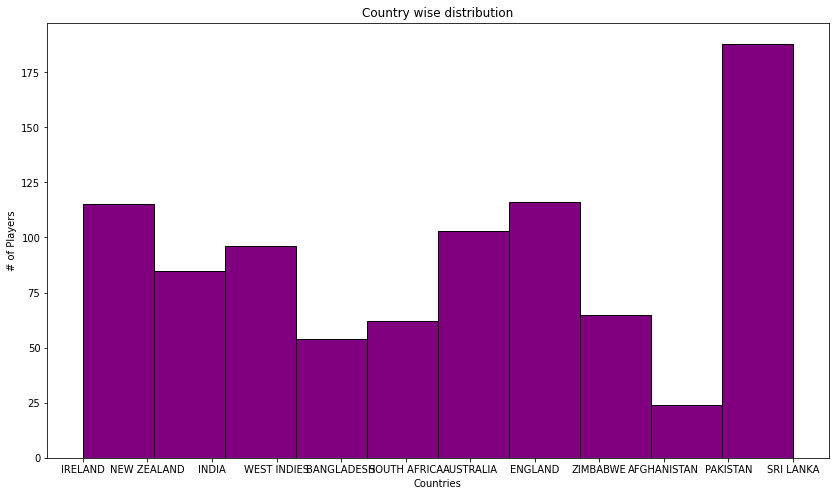

In [83]:
df.Country.hist(grid=False, figsize=(14, 8), bins=10, color='purple', edgecolor='black')
plt.ylabel("# of Players")
plt.xlabel("Countries")
plt.title("Country wise distribution")

Text(0.5, 1.0, 'Batting Average Distribution')

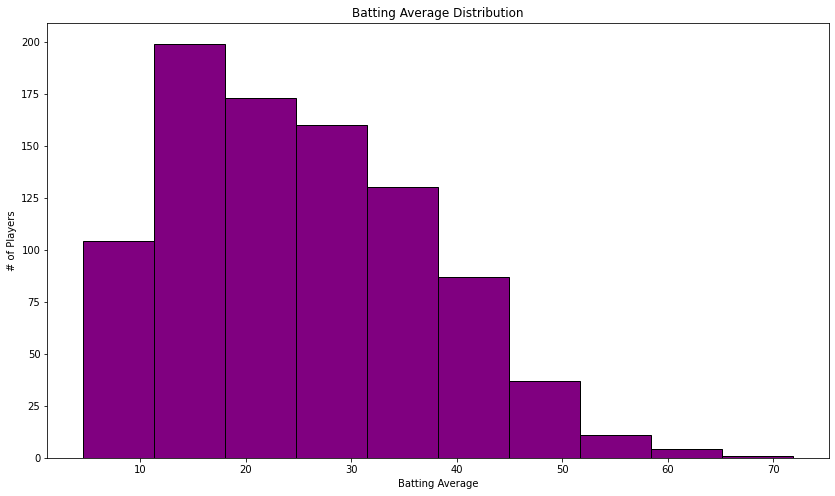

In [84]:
df.Ave.hist(grid=False, figsize=(14, 8), bins=10, color='purple', edgecolor='black', align='right')
plt.ylabel("# of Players")
plt.xlabel("Batting Average")
plt.title("Batting Average Distribution")


Text(0.5, 1.0, 'Batting Average Distribution by Inns played')

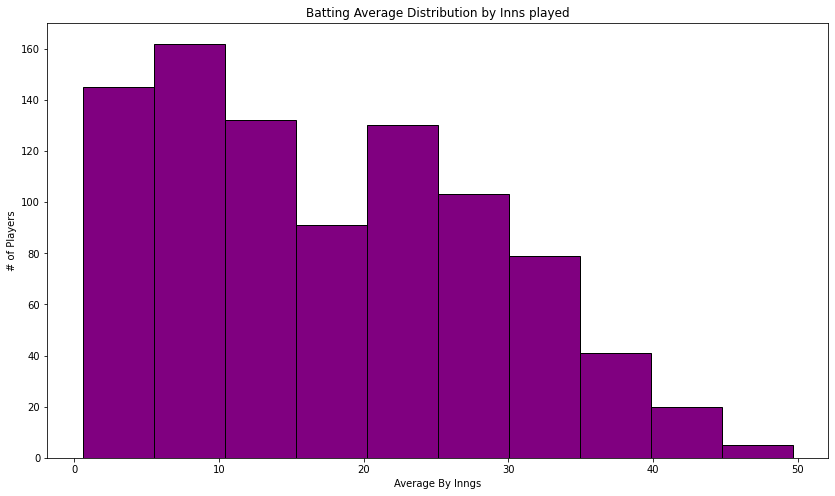

In [85]:
df['Arithmatic Average of Total Runs by Inns Played'].hist(grid=False, color='purple', figsize=(14, 8), edgecolor='black')
plt.xlabel('Average By Inngs')
plt.ylabel('# of Players')
plt.title("Batting Average Distribution by Inns played")


Text(0.5, 1.0, 'Strike Rate Distribution')

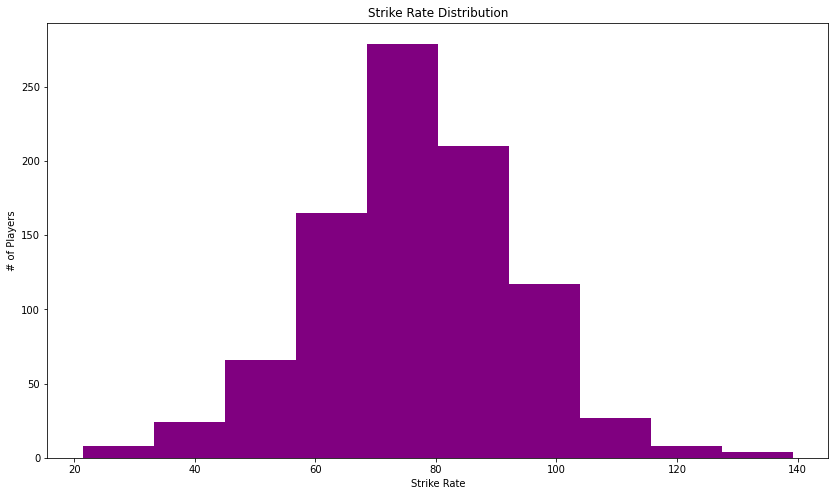

In [86]:
df.SR.hist(grid=False, figsize=(14, 8), bins=10, color='purple', align='right')
plt.ylabel("# of Players")
plt.xlabel("Strike Rate")
plt.title("Strike Rate Distribution")
# plt.yticks(range(0,30,5))

([<matplotlib.axis.XTick at 0x7f5a35ce8d30>,
 [Text(0, 0, ''), Text(0, 0, '')])

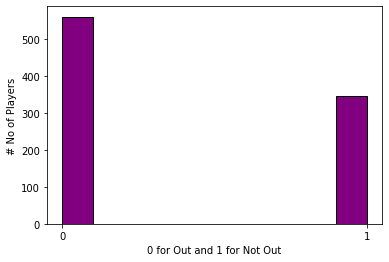

In [87]:
df['Not Out when scored highest'].hist(grid=False, color='purple', edgecolor='black')
plt.xlabel("0 for Out and 1 for Not Out")
plt.ylabel("# No of Players")

plt.xticks([0,1])

array([[<AxesSubplot:title={'center':'100'}>,
        <AxesSubplot:title={'center':'50'}>]], dtype=object)

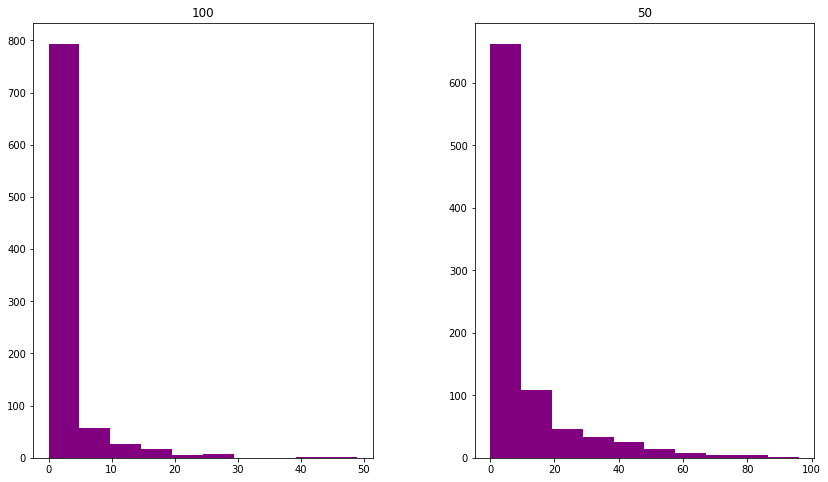

In [88]:
df.hist(column=['100','50'], grid=False, figsize=(14, 8), bins=10, color='purple')

Text(0.5, 1.0, 'Total Years Played Distribution')

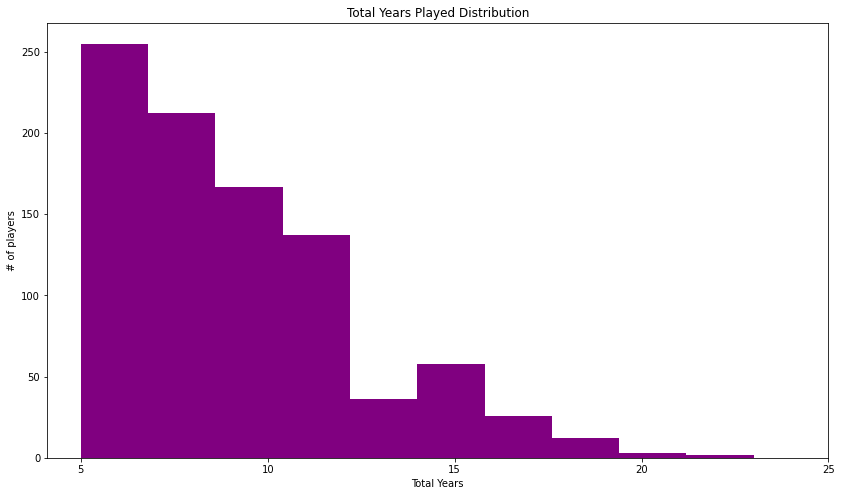

In [89]:
df['Total Years'].hist(grid=False, color='purple', figsize=(14, 8))
plt.xlabel('Total Years')
plt.ylabel('# of players')
# plt.yticks(range(0, 25, 5))
plt.xticks(range(5,30,5))
plt.title('Total Years Played Distribution')

In [90]:
df.columns

Index(['index', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave',
       'BF', 'SR', '100', '50', '0', '4s', '6s', 'Country', 'Debut Year',
       'Last Year', 'Total Years', 'Innings per Matches',
       'Not outs per innings',
       'Arithmatic Average of Total Runs by Inns Played',
       'Not Out when scored highest', 'HS Numeric', '100's per innings',
       '50's per innings', '0's per innings', '4s numeric', '6s numeric',
       'boundaries', '4s per Inns', '6s per Inns', 'Boundary Ave per Inns',
       'boundaries per innings', 'runs scored by boundaries',
       'boundaries to runs ratio', 'runs without boundaries',
       'BF without boundaries', 'Strike Rate without boundaries',
       'Avg runs per year'],
      dtype='object')

In [91]:
corr = df[['boundaries per innings', 'SR', 'Strike Rate without boundaries', 'HS Numeric', 'Ave', 'Avg runs per year', 'Total Years', 'Arithmatic Average of Total Runs by Inns Played', 'Boundary Ave per Inns', '100\'s per innings']].corr()
corr

,boundaries per innings,SR,Strike Rate without boundaries,HS Numeric,Ave,Avg runs per year,Total Years,Arithmatic Average of Total Runs by Inns Played,Boundary Ave per Inns,100's per innings
boundaries per innings,1.000000,0.506882,0.155690,0.885367,0.881776,0.768425,0.256680,0.945847,0.997830,0.769128
SR,0.506882,1.000000,0.694537,0.445223,0.458482,0.360740,0.137186,0.415879,0.534529,0.284152
Strike Rate without boundaries,0.155690,0.694537,1.000000,0.223436,0.353402,0.224791,0.082241,0.243378,0.164572,0.111455
HS Numeric,0.885367,0.445223,0.223436,1.000000,0.841950,0.817340,0.407961,0.898428,0.882729,0.719809
Ave,0.881776,0.458482,0.353402,0.841950,1.000000,0.769910,0.257552,0.955500,0.876416,0.691116
Avg runs per year,0.768425,0.360740,0.224791,0.817340,0.769910,1.000000,0.387334,0.795259,0.764939,0.680370
Total Years,0.256680,0.137186,0.082241,0.407961,0.257552,0.387334,1.000000,0.275210,0.257226,0.196006
Arithmatic Average of Total Runs by Inns Played,0.945847,0.415879,0.243378,0.898428,0.955500,0.795259,0.275210,1.000000,0.937538,0.737212
Boundary Ave per Inns,0.997830,0.534529,0.164572,0.882729,0.876416,0.764939,0.257226,0.937538,1.000000,0.761360
100's per innings,0.769128,0.284152,0.111455,0.719809,0.691116,0.680370,0.196006,0.737212,0.761360,1.000000


[Text(0.5, 1.0, 'Correlation Matrix of Data')]

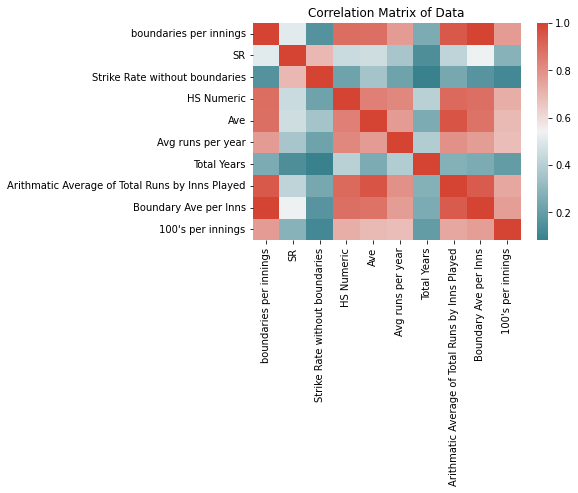

In [92]:
import seaborn as sns
cmap=sns.diverging_palette(210, 15, 80, as_cmap=True)
hm = sns.heatmap(corr, cmap=cmap, linewidths=.0)
hm.set(title='Correlation Matrix of Data')

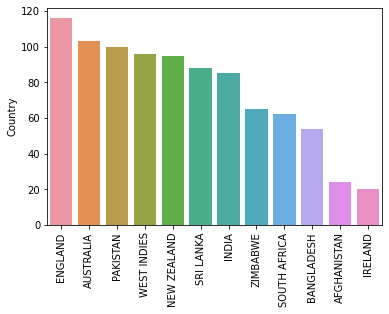

In [93]:
chart = sns.barplot(x=df['Country'].value_counts().index, y=df['Country'].value_counts())
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [94]:
values = ['NO', 'Runs', 'Inns', 'boundaries', 'Ave', 'Avg runs per year', 'Arithmatic Average of Total Runs by Inns Played', 'Total Years']
pd.pivot_table( df ,index=['Country'], values=values).sort_values(by='Runs', ascending=False)

,Arithmatic Average of Total Runs by Inns Played,Ave,Avg runs per year,Inns,NO,Runs,Total Years,boundaries
Country,,,,,,,,
INDIA,18.811281,23.451529,191.911485,83.917647,16.082353,2251.952941,9.352941,232.058824
SOUTH AFRICA,19.431837,25.486393,205.338450,73.161290,15.854839,1987.580645,8.451613,200.258065
SRI LANKA,16.559407,20.028391,150.055065,79.534091,13.795455,1847.045455,9.681818,178.545455
AUSTRALIA,18.320179,23.547670,176.024797,67.543689,13.728155,1765.543689,8.708738,166.524272
PAKISTAN,17.552123,22.396200,146.675274,74.210000,14.060000,1741.240000,9.650000,166.750000
WEST INDIES,16.995001,21.159063,136.085421,64.583333,12.187500,1524.802083,9.322917,156.250000
NEW ZEALAND,17.628232,21.761895,148.678216,63.326316,11.421053,1457.347368,8.694737,143.473684
IRELAND,17.775795,21.295000,132.688097,62.200000,9.800000,1410.400000,9.150000,152.300000
ZIMBABWE,15.361524,18.158769,116.848173,63.676923,9.892308,1327.092308,9.876923,127.953846


In [95]:
df_pivots = df[['Runs', 'Ave', 'Arithmatic Average of Total Runs by Inns Played', '100', '50', '0', 'Avg runs per year', 'Inns', 'NO', 'boundaries', 'SR']]

In [96]:
for i in df_pivots.columns:
    print(pd.pivot_table(df, index=['Total Years'], values=i).sort_values(i, ascending=False))

                     Runs
Total Years              
23           18426.000000
22           13364.000000
20            8979.500000
21            7381.000000
17            7249.285714
15            5797.826087
19            5418.200000
16            5349.250000
18            5138.428571
14            3639.600000
13            2954.388889
11            1999.132353
12            1902.043478
10            1521.715909
8             1117.883929
9              889.405063
7              675.800000
6              655.644628
5              434.141791
                   Ave
Total Years           
23           44.830000
21           41.700000
20           36.295000
22           32.510000
15           32.434348
16           32.345833
17           32.128571
18           28.114286
14           26.054286
13           25.567500
19           25.212000
11           23.888088
10           22.618409
12           21.790435
8            20.553125
9            20.037595
6            19.993500
5            19.5

In [97]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models import tools
hover = tools.HoverTool()
hover.tooltips=[
    ('Country', "@y"),
    ("Players", "@right")
]
v = df['Country'].value_counts()
p = figure(y_range=df['Country'].unique(),
           plot_width=800, plot_height=600, title='Number of Players that played ODI for more than 5 years for their respective countries',
           x_axis_label="Players", y_axis_label='Countries', tools='pan,wheel_zoom,zoom_in,zoom_out,box_select,reset,save'
          )
p.hbar(y=v.index, left=0, right=list(v), height=.4, fill_alpha=0.4)
p.add_tools(hover)
output_file("country_wise_players.html")
show(p)

In [98]:
countries = df['Country'].unique()
total_runs_for_each_country = []
for i in countries:
    total_runs_for_each_country.append(df[df['Country']==i]['Runs'].sum())
# print(total_runs_for_each_country)

# print(countries)
d = {}
j = 0
for i in countries:
    d[i] = total_runs_for_each_country[j]
    j += 1
d = sorted(d.items(), key= lambda x : x[1])
# d = d[::-1]
d = dict(d)
l = sorted(d)
a = dict()
for i in l:
    a[i] = d[i]
    
countries_sor = []
total_runs_sor = []
for k, v in a.items():
    countries_sor.append(k)
    total_runs_sor.append(v)

for i in range(len(total_runs_sor)):
    total_runs_sor[i] = int(total_runs_sor[i])
total_runs_sor

[22873,
 181851,
 63416,
 135864,
 191416,
 28208,
 138448,
 174124,
 123230,
 162540,
 146381,
 86261]

In [99]:
c = df.groupby('Country')
rns = (c.aggregate("max")['Runs'])

players = []

countries = df['Country'].value_counts().index.sort_values('Country')[0]
for i in countries:
    country_grp = df[df['Country'] == i]
    max_runs = max(country_grp['Runs'])
    
    players.append(df[df['Runs']==max_runs]['Player'].tolist()[0])
percent_of_runs = []
ave = []
arith_ave = []
sr = []
bound = []
hs = []
span = []
inns = []
for i in range(len(players)):
    percent = rns[i]/total_runs_sor[i]
    percent *= 100
    percent_of_runs.append(percent)
    ave.append(df[df['Player']==players[i]]['Ave'])
    arith_ave.append(df[df['Player']==players[i]]['Arithmatic Average of Total Runs by Inns Played'])
    sr.append(df[df['Player']==players[i]]['SR'])
    bound.append(df[df['Player']==players[i]]['boundaries'])
    hs.append(df[df['Player']==players[i]]['HS'])
    span.append(df[df['Player']==players[i]]['Span'])
    inns.append(df[df['Player']==players[i]]['Inns'])

    


In [100]:
images_url = [
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316558.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/319700/319711.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316583.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316564.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316400/316486.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316600/316638.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316538.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/320400/320454.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/320300/320358.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316500.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316400/316494.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/320300/320304.png"    
]

In [120]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Label, LabelSet, tools
countries  = list(df['Country'].value_counts().index.sort_values('Country')[0])
print(type(players[0]))
source = ColumnDataSource(data=dict(
    countries=countries,
    runs=list(rns),
    Players=players,
    percent=percent_of_runs,
    ave=ave,
    arith_ave = arith_ave,
    sr = sr,
    boundaries = bound,
    hs = hs,
    span = span,
    inns = inns,
    imgs = images_url
))
hover = tools.HoverTool()
hover.tooltips = [
    ('Country', '@countries'),
    ('Player', '@Players'),
    ('Runs', "@runs"),
    ('Years Active', "@span"),
    ('Innings', '@inns'),
    ('% of total runs', "@percent"),
    ("Highest Score", "@hs"),
    ('Batting Average', "@ave"),
    ("Average runs per Inns", "@arith_ave{0.00}"),
    ("Strike Rate", '@sr'),
    ("Total Boundaries(4s and 6s)", "@boundaries"),
    
]
hover.tooltips = """
    <div>
        <div>
            <img
                src="@imgs" height="100" alt="@imgs" width="100"
                style="float: center; margin: 30px 15px 15px 0px;"
                border=".2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">Country</span>
            <span style="font-size: 15px; color: #966;">@countries</span>
        </div>
        <div>
            <span>Runs</span>
            <span>@runs{000,000}</span>
        </div>
        <div>
            <span style="font-size: 15px;">Batting Average</span>
            <span style="font-size: 10px; color: #696;">@ave</span>
        </div>
    </div>
"""



labels = LabelSet(x='runs', y='countries', text='Players',x_offset=5, y_offset=8,text_font_size='14px', text_font_style='italic', source=source, render_mode='canvas', text_align='right')
v = df['Country'].value_counts()
p = figure(y_range=countries[::-1],
           plot_width=800, plot_height=700, title='Graph for Highest Run Scorer for each Country in history of ODI',
           x_axis_label="Runs", y_axis_label='Countries', tools='pan,wheel_zoom,zoom_in,zoom_out,box_select,reset,save'
          )
p.hbar(y='countries', right='runs', source=source, height=.4, fill_alpha=.5)
p.add_tools(hover)
p.add_layout(labels)

output_file("Country_wise_runs.html")
show(p)

<class 'int'>
Opening in existing browser session.


In [102]:
images_url = [
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316558.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/319700/319711.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316583.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316564.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316400/316486.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316600/316638.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316538.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/320400/320454.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/320300/320358.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316500/316500.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/316400/316494.png",
    "https://img1.hscicdn.com/image/upload/f_auto,t_gn_f_345/lsci/db/PICTURES/CMS/320300/320304.png"    
]
countries_images_url = [
    "https://flagcdn.com/256x192/af.png",
    "https://flagcdn.com/256x192/au.png",
    "https://flagcdn.com/256x192/bd.png",
    "https://flagcdn.com/256x192/gb-eng.png",
    "https://flagcdn.com/256x192/in.png",
    "https://flagcdn.com/256x192/ie.png",
    "https://flagcdn.com/256x192/nz.png",
    "https://flagcdn.com/256x192/pk.png",
    "https://flagcdn.com/256x192/za.png",
    "https://flagcdn.com/256x192/lk.png",
    "https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.flagz.co.nz%2Fwp-content%2Fuploads%2F2015%2F02%2FWest-Indies-flag.jpg&f=1&nofb=1",    
    "https://flagcdn.com/256x192/zw.png"
    
]

In [103]:
c = df.groupby('Country')
# country wise players
total_players = c.aggregate("count")['Player']
player_count = list(total_players)
countries = list(total_players.index)
# runs per total matches irrespective of innings

# get the country wise avg runs, avg sr, total boundaries, total centuries, total fifties
# avg runs
avg_per_player = list(c.aggregate("mean")['Runs'])
# avg strike rate
avg_strike_rate = list(c.aggregate("mean")['SR'])
# total boundaries
total_boundaries = list(c.aggregate("sum")['boundaries'])
# total centuries
total_centuries = list(c.aggregate("sum")["100"])
# total fifties
total_fifties = list(c.aggregate("sum")["50"])
# total runs sor
total_runs_sor = list(c.aggregate("sum")['Runs'])

In [119]:
from bokeh.plotting import ColumnDataSource, figure, output_file, show

from bokeh.models import NumeralTickFormatter, LogScale, HoverTool

output_file("total_runs_by_each_country.html")

source = ColumnDataSource(data=dict(
    x=total_runs_sor,
    y=countries_sor,
    player_count = player_count,
    avg = avg_per_player,
    sr = avg_strike_rate,
    total_boundaries = total_boundaries,
    total_centuries = total_centuries,
    total_fifties = total_fifties,
    
    imgs = countries_images_url
))

hover = HoverTool(line_policy='interp', point_policy='follow_mouse')

hover.tooltips = """
   
    <div>
    <link href='https://fonts.googleapis.com/css?family=Source+Sans+Pro' rel='stylesheet' type='text/css'>
        <center>
        <div>
            <img
                src="@imgs" height="128" alt="@imgs" width="96"
                style="float: center; margin: 0px 15px 15px 0px;"

            ></img>
        </div>
        </center>
        <div">
            <div style="display: table-row";>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; display: table-cell; padding-right: 1em; color: #0af">Country: </span>
                <span style="font-size: 15px; font-family: 'Source Sans Pro',  color: #000;">@y</span>
            </div>
            <div style="display: table-row";>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; display: table-cell; padding-right: 1em; color: #0af">Runs: </span>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; color: #000;">@x{000,000}</span>
            </div>
            <div style="display: table-row";>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; display: table-cell; padding-right: 1em; color: #0af">Total Players: </span>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; color: #000;">@player_count</span>
            </div>
            <div style="display: table-row";>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; display: table-cell; padding-right: 1em; color: #0af">Avg Runs per Player: </span>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; color: #000;">@avg{0.00}</span>
            </div>
            <div style="display: table-row";>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; display: table-cell; padding-right: 1em; color: #0af">Avg Strike Rate: </span>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; color: #000;">@sr</span>
            </div>
            <div style="display: table-row";>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; display: table-cell; padding-right: 1em; color: #0af">Total Boundaries: </span>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; color: #000;">@total_boundaries{0,000}</span>
            </div>
            <div style="display: table-row";>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; display: table-cell; padding-right: 1em; color: #0af">Total Centuries: </span>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; color: #000;">@total_centuries{0,000}</span>
            </div>
            <div style="display: table-row";>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; display: table-cell; padding-right: 1em; color: #0af">Total Half Centuries: </span>
                <span style="font-size: 15px; font-family: 'Source Sans Pro', sans-serif; color: #000;">@total_fifties{0,000}</span>
            </div>
        </div>
    </div>

"""

# TOOLTIPS = [
#     ("Country", "@y"),
#     ("Runs", "@x{000,000}"),
#     ("Total Players", "@player_count"),
#     ("Average Runs per Player", "@avg{0.00}" ),
#     ("Average Strike Rate", "@sr"),
#     ("Total Boundaries", "@total_boundaries{0,000}"),
#     ("Total Centuries", "@total_centuries{0,000}"),
#     ("Total Half Centuries", "@total_fifties{0,000}")
# ]

p = figure(width=800, height=800,  y_range=countries_sor[::-1],
           title="Total Runs by each Country in ODI (Considering all the players who played for more than 5 years)",
           x_axis_label='Total Runs',
           y_axis_label='Countries',
           
          )
p.add_tools(hover)
p.hbar(
    y = "y",
    left=0,
    right="x",
    height=.4,
    source=source,
    fill_alpha=.5
)
p.xaxis.formatter=NumeralTickFormatter(format="000,000")

show(p)

Opening in existing browser session.


In [105]:
df.columns

Index(['index', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave',
       'BF', 'SR', '100', '50', '0', '4s', '6s', 'Country', 'Debut Year',
       'Last Year', 'Total Years', 'Innings per Matches',
       'Not outs per innings',
       'Arithmatic Average of Total Runs by Inns Played',
       'Not Out when scored highest', 'HS Numeric', '100's per innings',
       '50's per innings', '0's per innings', '4s numeric', '6s numeric',
       'boundaries', '4s per Inns', '6s per Inns', 'Boundary Ave per Inns',
       'boundaries per innings', 'runs scored by boundaries',
       'boundaries to runs ratio', 'runs without boundaries',
       'BF without boundaries', 'Strike Rate without boundaries',
       'Avg runs per year'],
      dtype='object')

In [106]:
no_of_players = list(df['Country'].value_counts())
countries = list(df['Country'].value_counts().index)
d = {}
j = 0
for i in countries:
    d[i] = no_of_players[j]
    j+=1
    
l = sorted(d)
a = {}
for i in l:
    a[i] = d[i]
print(a)
countries = list(a.keys())
players = list(a.values())


Opening in existing browser session.
{'AFGHANISTAN': 24, 'AUSTRALIA': 103, 'BANGLADESH': 54, 'ENGLAND': 116, 'INDIA': 85, 'IRELAND': 20, 'NEW ZEALAND': 95, 'PAKISTAN': 100, 'SOUTH AFRICA': 62, 'SRI LANKA': 88, 'WEST INDIES': 96, 'ZIMBABWE': 65}
Opening in existing browser session.
